# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at *Piccardi Music,* a promising new music label created by a mysterious Italian disc jockey "*Signor Piccardi*". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column   | Description  |
|----------|:-------------|
| `artist`           | The name of the artist who created the album being reviewed. |
| `album`            | The name of the album being reviewed. |
| `recordlabel`      | The name of the record label(s) who published the album. |
| `releaseyear`      | The year that the album was released. |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0. |
| `reviewauthor`     | The name of the author who reviewed the album. |
| `genre`            | The genre assigned to the album by Pitchfork. |
| `reviewdate`       | The date that the review was published.  |
| `key` | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on) |
| `acousticness` | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic. |
| `danceability` | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.
| `energy` | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy. |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals. |
| `liveness` | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live. |
| `loudness` | The overall loudness of the album in decibels (dB). |
| `speechiness` | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence` | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds. |
| `tempo` | The overall estimated tempo of an album in beats per minute (BPM). |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.

In [1]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# displaying markdown strings
from IPython.display import display, Markdown, Latex


#remove warnings
pd.options.mode.chained_assignment = None

## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

### **Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

#### 1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

In [2]:
PATH = 'data/pitchfork.csv.gz'
plt.rcParams['figure.figsize'] = (14, 10)

We check if there is no bad lines, and since there isn't any, we simply drop the duplicates as asked and print the number of rows. We also print a few entries to get a sense of what a row looks like.

In [3]:
reviews = pd.read_csv(PATH, compression='gzip', on_bad_lines='warn').drop_duplicates(subset = ['artist', 'album'])
print('Once we remove the duplicates, there are ' + str(len(reviews.index)) + ' rows in our dataset.')

Once we remove the duplicates, there are 16738 rows in our dataset.


In [4]:
reviews.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


#### 2. Plot the distribution of album release years and the average score of albums per year.

The release years are given as float numbers which doesn't make sense here (it's release *year*, which are integers), so we first convert them to integers as it makes things a bit easier later on. For the second part, we decide to add the two years where there's been no review as years with 0 score, this is to better visualise the fact that there's no review on these two years once we plot the average score per year (otherwise there would be no "gap" in the plot between 1957 and 1959 and this could be slightly misleading. Everything else is pretty straightforward.

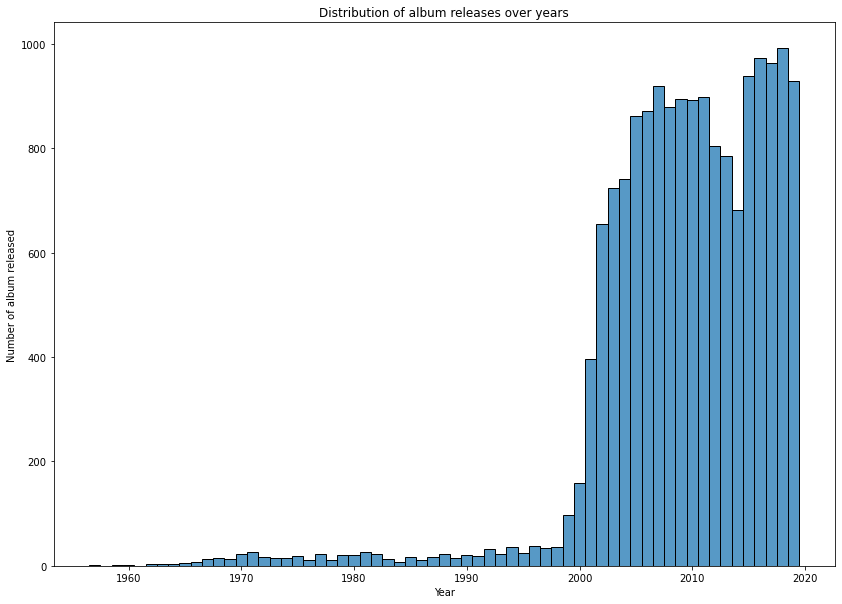

In [5]:
reviews['releaseyear'] = reviews['releaseyear'].apply(lambda x: int(x))
sns.histplot(reviews['releaseyear'], discrete=True)

plt.title('Distribution of album releases over years')
plt.xlabel('Year')
plt.ylabel('Number of album released');

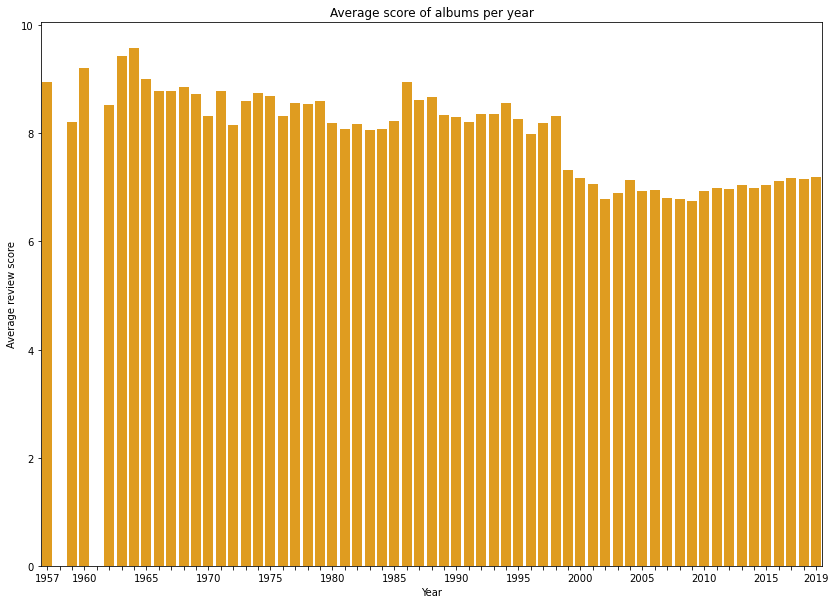

In [6]:
average_score_per_year = reviews.groupby(['releaseyear']).score.mean()

#check years with no reviews and add them
index_list = list(average_score_per_year.index)
for i in range(len(index_list)-1):
    if index_list[i] + 1 != index_list[i+1]:
        average_score_per_year[int(index_list[i] + 1)] = 0
    
average_score_per_year = average_score_per_year.sort_index()

ax = sns.barplot(x=average_score_per_year.index, y=average_score_per_year.values, color='orange')
plt.title('Average score of albums per year')
plt.xlabel('Year')
plt.ylabel('Average review score')

#simply to sparse the x labels so that it's easier to read
for label in ax.get_xticklabels():
    if int(label.get_text()) % 5 == 0 or int(label.get_text()) == 1957 or int(label.get_text()) == 2019 :  
        label.set_visible(True)
    else:
        label.set_visible(False)

#### 3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

We assume the release year column is numerical because it is a small numerical natural set but not the review date column as it is a datetime (as per pandas' [doc](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_numeric_dtype.html)). This is fully arbitrary and we could have chosen to convert the review date to decimals and take it as numerical data.

We noticed that there are a few columns with nonsensical minimal values (i.e row with energy equal to -1). So as mentioned [here](https://ada2021epfl.zulipchat.com/#narrow/stream/302231-Homework/topic/.E2.9C.94.20H2.3A.20Task.201.2E3) (zulip post) we decide to remove rows with such values and recompute our statistics.  

For the second part, we simply plot the distribution of each numerical column in its own subplot. We see that some distributions are skewed and we could choose to use a log scale (say for  speechiness) but we don't think it's that useful for now and we prefer to avoid it since putting both linear and logarithmic scale on a same image could be misleading/confusing.  
Another idea for this task could have been plotting several distributions on the same plot as quite a few share the same x-space \[0,1\] however the reader could then think we did so to compare the categories between them more easily, which is not the case. For example, we could have plotted on the same plot the distributions of column representing a probability.

Note that similarly to what we did for the release years, we convert the key values to integers (instead of floats).


In [7]:
reviews['key'] = reviews['key'].apply(lambda x: int(x))

reviews.describe().loc[['mean','50%','min','max']].rename(index={'50%' : 'median'})

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mean,7.048596,2009.346338,0.512334,0.601276,4.804875,-9.283268,0.090742,0.301914,0.274748,0.196402,0.405268,120.326487
median,7.300000,2010.000000,0.511348,0.624722,5.000000,-8.444263,0.056665,0.228844,0.149363,0.174261,0.406288,120.397346
min,0.000000,1957.000000,-1.000000,-1.000000,-1.000000,-51.728750,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


In [8]:
#get columns where there are nonsensical values
list_columns = list(reviews.describe().iloc[:, [2,3,4,6,7,8,9,10,11]])

for category in list_columns:
    reviews.drop(reviews.loc[reviews[category] < 0].index, inplace=True)

reviews.describe().loc[['mean','50%','min','max']].rename(index={'50%' : 'median'})

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mean,7.048536,2009.345965,0.512967,0.601951,4.807233,-9.286912,0.091208,0.302476,0.275303,0.196910,0.405853,120.377216
median,7.300000,2010.000000,0.511364,0.624823,5.000000,-8.446428,0.056681,0.229000,0.149641,0.174304,0.406300,120.406490
min,0.000000,1957.000000,0.038667,0.000126,0.000000,-51.728750,0.008644,0.000001,0.000000,0.015300,0.000010,23.983333
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


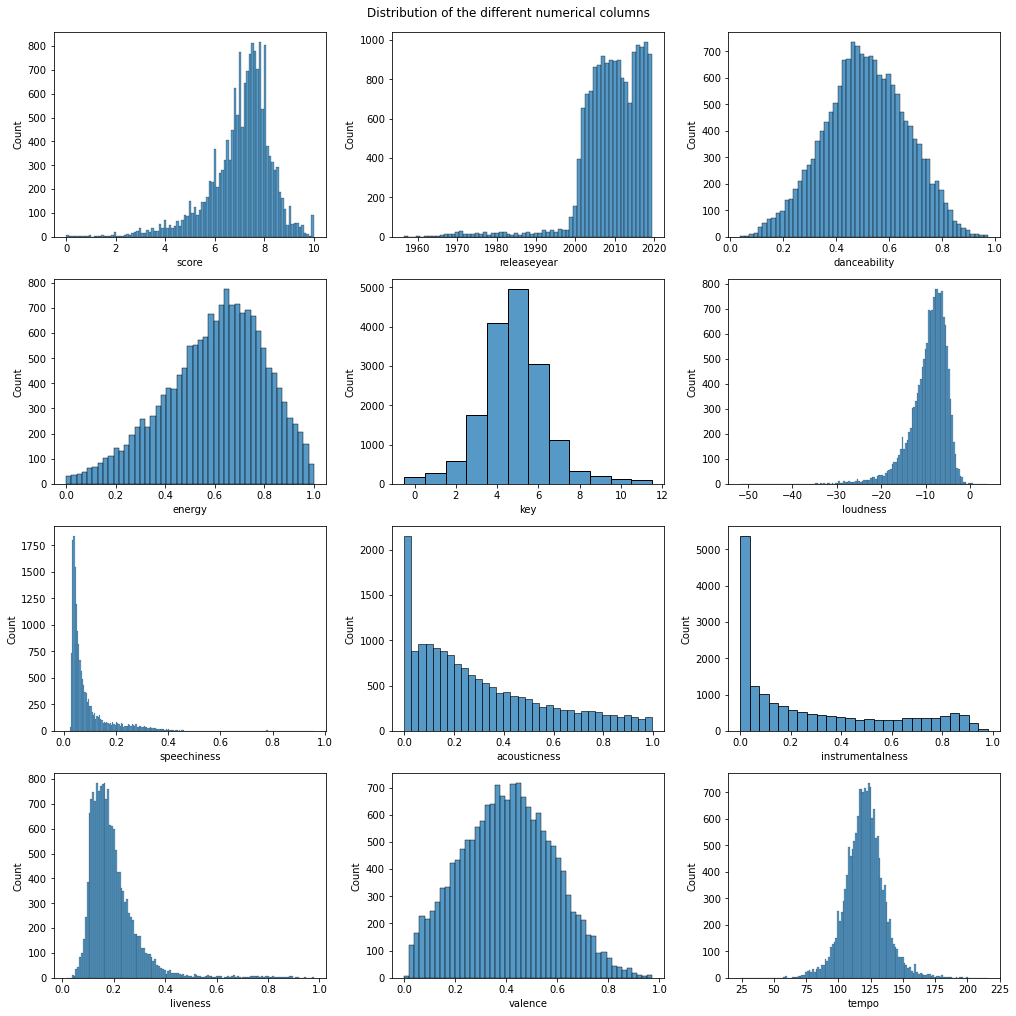

In [9]:
fig, axs = plt.subplots(4,3,figsize= (14,14), constrained_layout=True)
fig.suptitle('Distribution of the different numerical columns')

list_columns = list(reviews.describe())

for i in range(0,4):
    for j in range(0,3):
        discrete = True if (i,j) == (0,1) or (i,j) == (1,1) else False
       # log_scale = True if (i,j) == (2,0) else False
        sns.histplot(ax=axs[i,j], data=reviews[list_columns[3*i+j]], discrete=discrete)


#### 4. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

Pretty straightforward. We assume you didn't mean *strictly* less than 10 distinct values for a category as we wouldn't print anything otherwise. As said above, we consider the review date as categorical data and we convert it to the datetime format. We also print the proportions of reviews per genre, to see if some of them are over-represented.

In [10]:
reviews['genre'].replace(['none', np.NaN], 'Other', inplace=True)
reviews['reviewdate'] = pd.to_datetime(reviews['reviewdate'])
cat_columns = reviews.select_dtypes(exclude=['int', 'float']).columns.tolist()

for cat in cat_columns:
    nb_diff_values = len(reviews[cat].value_counts())
    print('There are ' + str(nb_diff_values) + ' different values in the ' + cat + ' category.')
    if nb_diff_values <= 10:
        print('Moreover, the different values for the ' + cat + ' category are :' + str(reviews[cat].value_counts().index.tolist()))

There are 7890 different values in the artist category.
There are 16176 different values in the album category.
There are 554 different values in the reviewauthor category.
There are 4876 different values in the reviewdate category.
There are 3030 different values in the recordlabel category.
There are 10 different values in the genre category.
Moreover, the different values for the genre category are :['Rock', 'Electronic', 'Experimental', 'Rap', 'Pop/R&B', 'Metal', 'Folk/Country', 'Jazz', 'Global', 'Other']


In [11]:
reviews['genre'].value_counts(normalize=True)

Rock            0.400418
Electronic      0.212911
Experimental    0.097908
Rap             0.096175
Pop/R&B         0.076748
Metal           0.045069
Folk/Country    0.043873
Jazz            0.016617
Global          0.009623
Other           0.000658
Name: genre, dtype: float64

#### 5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected.



1. We know from their Wikipedia page that Pitchwork used to focus on indie rock music, and is still covering a larger portion of this genre. We also see above that Rock has almost twice many reviews as the second most reviewed genre. Their reputation would also make attract rock reviewers more than other genre reviewers. The fact that the data is so heavily skewed toward only one genre means it cannot really be representative of music albums in general, even though with time Pitchfork expanded its range of genre reviews.
2. We see that pretty much at the same time the number of album release incresead by a lot, the average rewiew score dropped by quite a bit. We also see on the wikipedia page that retrospective ratings happen, so there may be a nostalgia bias from the reviewers meaning it might not be representative.
3. It seems most albums reviewed are probably not live albums, however some album are specifically designed, or simply more fit for live environments.

---

### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

#### 1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 

Pretty straightforward.

In [12]:
genre_list = reviews['genre'].value_counts().index.tolist()

for genre in genre_list:
    new_col = genre+'_onehot'
    reviews[new_col] = (reviews['genre'] == genre).astype(int)
    
reviews

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Rock_onehot,Electronic_onehot,Experimental_onehot,Rap_onehot,Pop/R&B_onehot,Metal_onehot,Folk/Country_onehot,Jazz_onehot,Global_onehot,Other_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009,2009-02-18,Studio,Electronic,0.511917,0.499667,...,0,1,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005,2005-02-13,Water,Folk/Country,0.369765,0.325412,...,0,0,0,0,0,0,1,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004,2004-08-19,In the Red,Electronic,0.253943,0.912857,...,0,1,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003,2003-07-17,Badman,Rock,0.425400,0.433474,...,1,0,0,0,0,0,0,0,0,0
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16772,Flying Lotus,Flamagra,Philip Sherburne,7.8,2019,2019-05-24,none,Electronic,0.536750,0.652050,...,0,1,0,0,0,0,0,0,0,0
16773,YG,4REAL 4REAL,Sheldon Pearce,7.2,2019,2019-05-24,none,Rap,0.815429,0.556929,...,0,0,0,1,0,0,0,0,0,0
16774,Mavis Staples,We Get By,Stephen M. Deusner,7.5,2019,2019-05-24,none,Pop/R&B,0.633636,0.374664,...,0,0,0,0,1,0,0,0,0,0
16775,Amyl and the Sniffers,Amyl and the Sniffers,Stephen Thomas Erlewine,7.2,2019,2019-05-24,none,Rock,0.440909,0.876636,...,1,0,0,0,0,0,0,0,0,0


#### 2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

This question is a bit unclear so we will assume the following : the M columns `cols` are a subset of the input dataframe columns and so basically what we're asked to do is to remove every column of `df` that is not in `cols` and return the new dataframe as a numpy array.

In [13]:
def numpy_helper(df, cols):
    return df[cols].to_numpy()

#### 3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

Pretty straightforward.

In [14]:
onehots = []
for name in reviews.columns:
    if name.endswith('onehot'):
        onehots += [name] 
        
X = numpy_helper(reviews, onehots)
y = numpy_helper(reviews, ['score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### 4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

Our regressor estimates the average as intercept parameter and zeros for all other parameters. As such, we add a (temporary) intercept term for each sample inputed in the `baseline_regressor_predict` function and then compute its dot product with our (constant) regressor so that our classifier always predicts the average score of all albums from the training set.

In [15]:
baseline_regressor_fit = np.concatenate(([np.mean(y_train)], np.zeros(X.shape[1])))

#Takes an array of samples as input and compute a prediction for each of them : outputs the vector of predicted values
def baseline_regressor_predict(X):
    X_with_intercept = np.concatenate((np.array([np.ones(X.shape[0]),]).T, X), axis=1)
    return np.dot(X_with_intercept, baseline_regressor_fit)

print('Our regressor learns the following parameters : ' + str(baseline_regressor_fit))

Our regressor learns the following parameters : [7.04979079 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

Pretty straightforward. Note that this R² should be around 0 so the difference is probably due to float approximation error, and the fact that test set is different from train set, so our constant model is a little worse than one obtained using test data.

In [16]:
print('The R² metrics of our baseline regressor on the test data is ' + str(r2_score(y_test, baseline_regressor_predict(X_test))) + '.')

The R² metrics of our baseline regressor on the test data is -1.0839329994682956e-05.


6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

This is a problem because Machine Learning models rely heavily on the quality of the input data, i.e. if you feed bad quality data to your model to train it and don't take it into account, your model will probably not be very reliable. The problem here is that our data is quite unbalanced. More specifically, 40% of all our data is Rock while Jazz only accounts for 1% of all data. So there could be cases where all (or almost all) the Jazz entries (which represents 1% of our data) could be in the test set (30%) and not at all in the train set, hence there is no way our trained model could predict the score of Jazz albums effectively. This is also the case for other genre which are quite underrepresented in our dataset. In general, problem is that quality of our model relies on particular split. To counter this, we could use stratified cross-validation instead of random cross validation, where the splitting of data is governed by criteria such as ensuring that each split has the same proportion of observations with a given categorical value.

---

**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

## 3.1

In [17]:
features = ['releaseyear', 'key', 'acousticness', 'danceability','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo']
features = features + onehots
target = 'score'
X = reviews[features].values
y = reviews[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
lr = LinearRegression()
lr.fit(X_train, y_train) # we will use the fit method to “fit” the model to our dataset.
print('The R² metrics of our baseline regressor on the test data is ' + str(r2_score(y_test, lr.predict(X_test))) + '.')

The R² metrics of our baseline regressor on the test data is 0.03856980827989931.


## 3.2

In [18]:
training = reviews[reviews['releaseyear']<2000]
test = reviews[reviews['releaseyear']>=2003]
X_train = training[features].values
X_test = test[features].values
y_train = training[target].values
y_test = test[target].values
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
print('The R² metrics of our baseline regressor on the test data is ' + str(r2_score(y_test, prediction)) + '.')

The R² metrics of our baseline regressor on the test data is -0.28281151443460195.


###### We see that we obtain a significant negative value for 𝑅^2. We know R^2 compares the fit of the chosen model with that of the horizontal straight line (the null hypothesis). So if we obtain a negative value for R^2 it means that the model selected does not follow the trend of the data, therefore leading to a worse fit than the horizontal line.  Thus we can assume that the longitudinal split forces our linear model with a wrong constraint such as the intercept or the slop which doesn't fit the real data .  
######  This bad result comes from the fact that the training data distribution isn't the same as the testing data as the year of release is not the same in the training and testing set . 




## 3.3

We obtain a confidence interval of [ 0.107050 , 0.110928 ] with a confidence level of 95 % for the probability that our score prediction is off by more than 2-points


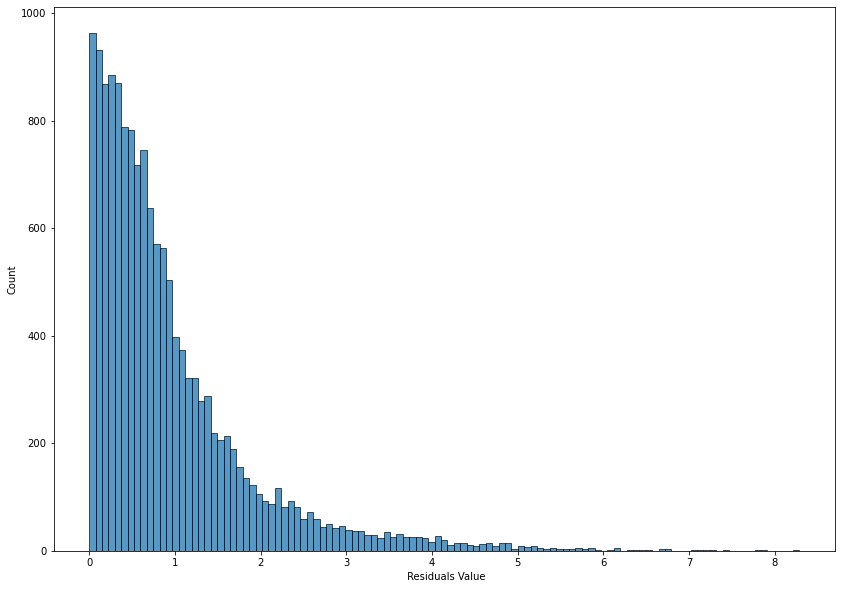

In [19]:
residuals = np.absolute(y_test - prediction)
g = sns.histplot(residuals)
g.set(xticks = range(0,9,1),xlabel = " Residuals Value")

N = 1000 # our value for the number of iteration in the bootstrapping
a = []
for i in range(N) :
    points = np.random.choice(residuals,size = N)
    condition = points[points > 2]
    proba = len(condition)/N
    a.append(proba)
# we computed an array of size N with probabilities that the residual is bigger than based on the bootstrapping technique    
a = np.array(a)  # a is an array of probabilities
std = np.std(a) # we calculate the standard deviation of our values
m = np.mean(a) # we calculate
# for a 95% confidence level the confidence level z = 1.96
# Now applying the formula CI = [m-z*std/sqrt(n), m+1.96*std/sqrt(n)]
inf = m-(1.96*std/10)
sup = m+(1.96*std/10)
print("We obtain a confidence interval of [ %f , %f ] with a confidence level of 95 %% for the probability that our score prediction is off by more than 2-points" %(inf,sup))


## 3.4

In [20]:
X_train = training[features].values
X_test = test[features].values
y_train = training[target].values
y_test = test[target].values
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)
print('The R² metrics of our baseline regressor on the test data is ' + str(r2_score(y_test, prediction)) + '.')

The R² metrics of our baseline regressor on the test data is -0.39772113333459114.


## 3.5

### Gradient boost seems to be even worse that the linear regression as the negative value for R^2 is even bigger. We could argue this by saying that gradient boost usually fits to our training data extremely well but because the training and testing data doesn't doesn't have the same distribution this makes the result even worse than it should be . 

**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

## 4.1

In [21]:
features = [ 'score','key', 'acousticness', 'danceability','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo']
features = features + onehots
column_name = {} # a dict for the new column name
for c in features : # c represents a column name
    column_name[c] = "%s_previous"%c   
mean_artist = reviews.groupby(['artist']).mean()
reviews = reviews.sort_values('releaseyear', ascending=False).drop_duplicates(['artist'])
print(len(reviews.index))
mean_artist = mean_artist.reset_index()

reviews = reviews.sort_values("artist") # we make sure that the lines are in order compared to the data frame mean_artist
reviews = reviews.reset_index()
reviews

7890


,index,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,...,Rock_onehot,Electronic_onehot,Experimental_onehot,Rap_onehot,Pop/R&B_onehot,Metal_onehot,Folk/Country_onehot,Jazz_onehot,Global_onehot,Other_onehot
0,10688,Gia Margaret,There’s Always Glimmer,Margaret Farrell,7.4,2018,2018-08-04,Orindal,Rock,0.484250,...,1,0,0,0,0,0,0,0,0,0
1,12379,JPEGMAFIA,Veteran,Paul A. Thompson,7.7,2018,2018-01-31,Deathbomb Arc,Rap,0.644368,...,0,0,0,1,0,0,0,0,0,0
2,16478,!!!,Wallop,Jesse Dorris,7.2,2019,2019-09-07,none,Rock,0.745643,...,1,0,0,0,0,0,0,0,0,0
3,16450,(Sandy) Alex G,House of Sugar,Anna Gaca,8.6,2019,2019-09-16,none,Rock,0.494308,...,1,0,0,0,0,0,0,0,0,0
4,9607,...And You Will Know Us by the Trail of Dead,IX,Stuart Berman,7.2,2014,2014-10-21,Superball,Rock,0.415900,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,213,Âme,Dream House,Daniel Martin-McCormick,4.8,2018,2018-06-02,Innervisions,Electronic,0.660727,...,0,1,0,0,0,0,0,0,0,0
7886,11359,Çaykh,V I S C 0 9,Tom Hawking,7.3,2018,2019-01-08,V I S,Experimental,0.477000,...,0,0,1,0,0,0,0,0,0,0
7887,14089,Ólafur Arnalds,Now I Am Winter,Brian Howe,5.5,2013,2013-04-09,Mercury,Rock,0.468375,...,1,0,0,0,0,0,0,0,0,0
7888,317,Ólöf Arnalds,Innundir Skinni,Jayson Greene,8.0,2010,2010-10-26,One Little Indian,Pop/R&B,0.527900,...,0,0,0,0,1,0,0,0,0,0


In [22]:
mean_artist

,artist,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,...,Rock_onehot,Electronic_onehot,Experimental_onehot,Rap_onehot,Pop/R&B_onehot,Metal_onehot,Folk/Country_onehot,Jazz_onehot,Global_onehot,Other_onehot
0,Gia Margaret,7.400000,2018.000000,0.484250,0.243983,2.000000,-13.395833,0.032183,0.758358,0.289499,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,JPEGMAFIA,7.700000,2018.000000,0.644368,0.767526,4.000000,-5.321263,0.306053,0.233973,0.049075,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,!!!,6.912500,2010.500000,0.707876,0.807219,5.000000,-6.728235,0.082388,0.073446,0.182877,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(Sandy) Alex G,8.500000,2018.000000,0.477725,0.614234,5.000000,-6.323434,0.041795,0.269276,0.301282,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,...And You Will Know Us by the Trail of Dead,7.172727,2006.363636,0.448968,0.644547,4.181818,-7.041162,0.064989,0.204713,0.182727,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,Âme,6.000000,2012.500000,0.659364,0.611564,2.500000,-8.728855,0.089059,0.290173,0.356316,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7886,Çaykh,7.300000,2018.000000,0.477000,0.976000,9.000000,-4.794000,0.131000,0.000029,0.005690,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7887,Ólafur Arnalds,5.825000,2011.000000,0.340566,0.169406,3.500000,-17.915552,0.104177,0.905448,0.715002,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7888,Ólöf Arnalds,8.000000,2010.000000,0.527900,0.142520,5.000000,-13.826600,0.043870,0.949200,0.119995,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
for k in column_name :
    reviews[column_name[k]] = mean_artist[k]
    # here k is the key of our column_name dictionary and the value is the name column with the previous end word
reviews    

,index,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,...,Rock_onehot_previous,Electronic_onehot_previous,Experimental_onehot_previous,Rap_onehot_previous,Pop/R&B_onehot_previous,Metal_onehot_previous,Folk/Country_onehot_previous,Jazz_onehot_previous,Global_onehot_previous,Other_onehot_previous
0,10688,Gia Margaret,There’s Always Glimmer,Margaret Farrell,7.4,2018,2018-08-04,Orindal,Rock,0.484250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12379,JPEGMAFIA,Veteran,Paul A. Thompson,7.7,2018,2018-01-31,Deathbomb Arc,Rap,0.644368,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16478,!!!,Wallop,Jesse Dorris,7.2,2019,2019-09-07,none,Rock,0.745643,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16450,(Sandy) Alex G,House of Sugar,Anna Gaca,8.6,2019,2019-09-16,none,Rock,0.494308,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9607,...And You Will Know Us by the Trail of Dead,IX,Stuart Berman,7.2,2014,2014-10-21,Superball,Rock,0.415900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,213,Âme,Dream House,Daniel Martin-McCormick,4.8,2018,2018-06-02,Innervisions,Electronic,0.660727,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7886,11359,Çaykh,V I S C 0 9,Tom Hawking,7.3,2018,2019-01-08,V I S,Experimental,0.477000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7887,14089,Ólafur Arnalds,Now I Am Winter,Brian Howe,5.5,2013,2013-04-09,Mercury,Rock,0.468375,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7888,317,Ólöf Arnalds,Innundir Skinni,Jayson Greene,8.0,2010,2010-10-26,One Little Indian,Pop/R&B,0.527900,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 4.2

In [50]:
features = features + list(column_name.values())
features.remove('score')

X = reviews[features].values
y = reviews[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)
print('The R² metrics of our baseline regressor on the test data is ' + str(r2_score(y_test, prediction)) + '.')

The R² metrics of our baseline regressor on the test data is 0.8221617882974458.


## 4.4

We didn't have time to write the code for 4.3 but the main reason is that in 3.4 the distribution of the data for the training set and the testing set were not the same which made the result really . 
In contrario here we splut our training and testing data at random with the same distribution so we can hope for a much better result . 
To fairly compare them we would have to take the testing and training with the same distribution at random in 3.4

## Part 2: Second Album Syndrome

Your second project at *Piccardi Music* is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).

**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

In [25]:
# Download data
df = pd.read_csv(PATH, compression='gzip', on_bad_lines='skip').drop_duplicates(subset = ['artist', 'album'])
df.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


## 5.1 & 5.2

In [26]:
# Drop duplicates
df = df.drop_duplicates()
df.shape

(16738, 18)

In [27]:
# Create a new column album_number 
df['album_number'] = df['artist'].map(df['artist'].value_counts())

# Only albums from artists with two or more albums and where the release year is not empty
df = df[(df.releaseyear != 0) & (df.album_number > 1)]
df

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,4
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,4
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,5
5,French Kicks,Swimming,Roque Strew,7.6,2008.0,August 27 2008,Vagrant,Electronic,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,4
6,Jessica Lea Mayfield,With Blasphemy So Heartfelt,Stephen M. Deusner,8.2,2008.0,November 11 2008,Polymer,Rock,0.447583,0.399083,6.500000,-8.402000,0.032267,0.694750,0.004033,0.123142,0.237933,111.549917,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16768,Morrissey,California Son,Ben Hewitt,5.9,2019.0,May 25 2019,none,Rock,0.480417,0.657000,4.083333,-5.798833,0.052375,0.167543,0.003680,0.133358,0.404542,125.641000,11
16769,Don Cherry,Brown Rice,Andy Beta,9.2,2019.0,May 25 2019,none,Jazz,0.624000,0.579000,7.000000,-8.389000,0.161000,0.348000,0.000032,0.204000,0.418000,182.968000,2
16772,Flying Lotus,Flamagra,Philip Sherburne,7.8,2019.0,May 24 2019,none,Electronic,0.536750,0.652050,5.350000,-8.583750,0.134820,0.215916,0.519892,0.192075,0.353705,124.988200,7
16773,YG,4REAL 4REAL,Sheldon Pearce,7.2,2019.0,May 24 2019,none,Rap,0.815429,0.556929,4.785714,-6.327643,0.259721,0.186476,0.000848,0.244586,0.361850,115.455857,5


## 5.3

In [28]:
# Sort by artist and then by year
df = df.sort_values(['artist', 'releaseyear'])

# For each artist write that the earliest album is the "first" and one after that is the "second". 

df['first_or_sec'] = ""      
        
a = 0
while a<df.shape[0]:
    df.first_or_sec.iloc[a] = 'first'
    df.first_or_sec.iloc[a+1] = 'second'
    a += df.album_number.iloc[a]


df

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number,first_or_sec
7411,!!!,Split EP,Dominique Leone,6.0,1999.0,February 12 2004,GSL,Rock,0.470000,0.909500,6.000000,-4.112000,0.095600,0.000449,0.000000,0.177500,0.596500,97.046500,8,first
6891,!!!,Louden Up Now,Nick Sylvester,7.0,2004.0,June 7 2004,Touch and Go,Rock,0.808273,0.751636,6.818182,-7.082636,0.080591,0.116632,0.400204,0.159191,0.692364,119.974091,8,second
10517,!!!,Myth Takes,Brian Howe,8.0,2007.0,March 2 2007,Warp,Rock,0.646500,0.831800,5.400000,-6.939000,0.069290,0.091973,0.254866,0.233740,0.561200,116.136200,8,
10053,!!!,"Strange Weather, Isn't It?",Larry Fitzmaurice,6.9,2010.0,August 20 2010,Warp,Rock,0.711889,0.881778,4.555556,-6.234556,0.047756,0.050500,0.236144,0.241333,0.763889,117.525000,8,
2397,!!!,Thr!!!er,Brian Howe,6.0,2013.0,April 30 2013,Warp,Rock,0.778222,0.798444,5.666667,-6.810778,0.060756,0.032423,0.076008,0.161244,0.808111,117.911111,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Âme,Dream House,Daniel Martin-McCormick,4.8,2018.0,June 2 2018,Innervisions,Electronic,0.660727,0.565727,4.727273,-10.905909,0.046518,0.253545,0.712627,0.154209,0.343464,117.085636,2,second
7754,Ólafur Arnalds,Found Songs,Brian Howe,6.3,2009.0,February 16 2010,Erased Tapes,Rock,0.319143,0.182857,6.000000,-13.987571,0.049486,0.934429,0.516714,0.078671,0.184971,123.722714,4,first
2494,Ólafur Arnalds,...And They Have Escaped the Weight of Darkness,Brian Howe,7.0,2010.0,June 10 2010,Erased Tapes,Rock,0.261889,0.148100,1.444444,-18.754000,0.033644,0.931222,0.879889,0.166900,0.079711,87.369556,4,second
15915,Ólafur Arnalds,Living Room Songs,Joe Colly,4.5,2012.0,February 16 2012,Erased Tapes,Rock,0.312857,0.131371,4.714286,-18.620286,0.036829,0.976143,0.929143,0.097457,0.102300,111.021286,4,


Mean score for the first album: 7.298905723905713
Mean score for the second album: 7.043294051627363
Standard deviation of mean score for the first album: 0.014658818827024127
Standard deviation of mean score for the second album: 0.015057887561386747


<ipython-input-29-ad5895bf1984>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_12_scores[df_12_scores.first_or_sec == 'first'].mean()[0])
<ipython-input-29-ad5895bf1984>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_12_scores[df_12_scores.first_or_sec == 'second'].mean()[0])
<ipython-input-29-ad5895bf1984>:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_12_scores[df_12_scores.first_or_sec == 'first'].std()[0]/np.sqrt(len(df_12_scores.first_or_sec)))
<ipython-input-29-

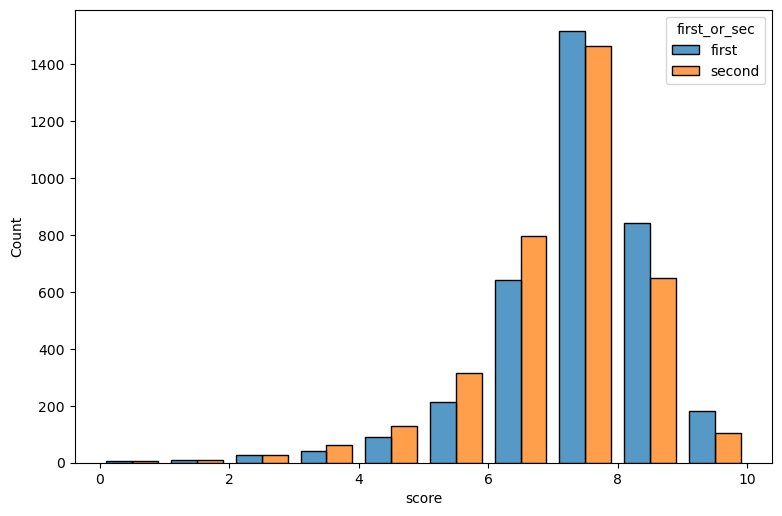

In [29]:
# Keep only first and second albums

df_12 = df[df.first_or_sec != ""]
df_12

df_12_scores = df_12.groupby(['artist', 'first_or_sec'])['score'].mean().reset_index()

# Calculate the mean and the standard error for the mean of the scores of the first 
# and second albums in the dataset. 

print('Mean score for the first album:', 
      df_12_scores[df_12_scores.first_or_sec == 'first'].mean()[0])
print('Mean score for the second album:', 
      df_12_scores[df_12_scores.first_or_sec == 'second'].mean()[0])

print('Standard deviation of mean score for the first album:', 
      df_12_scores[df_12_scores.first_or_sec == 'first'].std()[0]/np.sqrt(len(df_12_scores.first_or_sec)))
print('Standard deviation of mean score for the second album:', 
      df_12_scores[df_12_scores.first_or_sec == 'second'].std()[0]/np.sqrt(len(df_12_scores.first_or_sec)))

# Additionally, plot the two distributions.
# We use 10 bins, as it suits our 10-scale well

plt.figure(dpi=100, figsize=(9, 6))
ax = sns.histplot(x='score', data=df_12_scores,
            hue='first_or_sec', multiple='dodge', shrink=0.8, bins=10)

#### From the histogram, we see that for score of 7 or below, there are more second albums than first ones. For scores 8, 9, 10, situation is opposite. Given that we have same number of albums in each category, it seems that second album is indeed worse on average.

## 5.4

In [30]:
# We use t-test for the difference of the two means:
ttest_ind(df_12_scores[df_12_scores.first_or_sec == 'first'].score, 
                df_12_scores[df_12_scores.first_or_sec == 'second'].score, equal_var=False)

Ttest_indResult(statistic=8.60083965713691, pvalue=9.626353915302019e-18)

#### P-value is smaller than any reasonable significnce level, so we reject the null hypothesis that the two distributions are the same. Hence, there seems to be a statistically significant difference between the two albums scores.

## 5.5

#### The histogram and the t-test for the difference of the two means suggest that the "second album syndrome" may exist.

**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


## 6.1

In [31]:
# score_diff:

score_diff = df_12.score - df_12.score.shift(1)
score_diff = score_diff[1::2] #take every second element, we want second-first for same artist


# time_diff

time_diff = df_12.releaseyear - df_12.releaseyear.shift(1)
time_diff = time_diff*365
time_diff = time_diff[1::2] #same as above

In [32]:
# did_style_change

# standardized euclidean distance of music-related numerical 
# features between the second and the first album

edist = []
music = ["key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", 
         "loudness", "speechiness", "valence", "tempo"]

df_music = df_12[music]
df_music_1 = df_music[0::2]
df_music_2 = df_music[1::2]
v = df_music.var() #calculate variances, for seuclidean

In [33]:
n = df_music_1.shape[0]

# seuclidean is for vectors, not matrices, so iterate
edist = []
for i in range(n):
    dd = seuclidean(df_music_1.iloc[i], df_music_2.iloc[i], v)
    edist.append(dd)

In [34]:
#create new df with data
df_new = pd.DataFrame({'score_diff':score_diff, 'time_diff':time_diff, 'edist': edist})

# assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
df_new = df_new.sort_values('edist', ascending=False, ignore_index=True)

df_new['did_style_change'] = 0

border = int(n*0.2)-1 #correct, loc[0:n] gives n+1 elements
df_new.loc[0:border, 'did_style_change'] = 1
    
df_new = df_new.drop(columns = 'edist')
df_new

,score_diff,time_diff,did_style_change
0,0.0,1460.0,1
1,0.0,730.0,1
2,0.7,1095.0,1
3,-0.6,1460.0,1
4,2.3,730.0,1
...,...,...,...
3559,-0.6,1095.0,0
3560,0.8,730.0,0
3561,-0.4,365.0,0
3562,0.1,0.0,0


In [35]:
df_new.describe()

,score_diff,time_diff,did_style_change
count,3564.000000,3564.000000,3564.000000
mean,-0.255612,1312.730079,0.199776
std,1.381128,2037.239709,0.399888
min,-7.900000,0.000000,0.000000
25%,-0.900000,365.000000,0.000000
50%,-0.200000,730.000000,0.000000
75%,0.400000,1095.000000,0.000000
max,8.400000,21900.000000,1.000000


## 6.2

In [36]:
# Fit a linear regression "score_diff ~ 1" using statsmodels with this dataframe. 
X = [1]*df_new.shape[0]
model = sm.OLS(df_new.score_diff, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                nan
Time:                        23:39:54   Log-Likelihood:                -6207.4
No. Observations:                3564   AIC:                         1.242e+04
Df Residuals:                    3563   BIC:                         1.242e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2556      0.023    -11.049      0.000      -0.301      -0.210
==============================================================================
Omnibus:                      362.324   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2244.623
Skew:                          -0.266   Prob(JB):                         0.00
Kurtosis:                       6.851   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6.3

### We got that $R^2$ is zero. This is expected because we regressed dependent variable on the intercept only. R^2 shows how much of variation in the dependent variable is explained by the variation in the independent variable(s), and here we do not have the variation in the independent variable(s). This analysis does not say anything about the result in task 5. To say something, we need to regress not only on a constant.

## 6.4

In [37]:
X = df_new[['time_diff','did_style_change']].astype(float)
X = sm.add_constant(X)
model = sm.OLS(df_new.score_diff, X).fit()
model.summary()

C:\Users\ja-ja\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_diff   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.28
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.79e-15
Time:                        23:39:54   Log-Likelihood:                -6174.4
No. Observations:                3564   AIC:                         1.235e+04
Df Residuals:                    3561   BIC:                         1.237e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1321      0.029     -4.485      0.000      -0.190      -0.074
time_diff        -9.172e-05   1.13e-05     -8.146      0.000      -0.000   -6.96e-05
did_style_change    -0.0153      0.057     -0.267      0.789      -0.128       0.097
==============================================================================
Omnibus:                      335.032   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2071.432
Skew:                          -0.201   Prob(JB):                         0.00
Kurtosis:                       6.713   Cond. No.                     6.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 6.5 

### Interpretation of the coef for time_diff: the addition of 1 day between the release of the first album and the release of the second album leads to the decrease in second album score by -0.00009254 compared to the first album, on average, keeping other factors fixed.

### Interpretation of the coef for did_style_change: if the style of the second album is different from the first album, then the score of the second album is expected to be -0.0160 higher relative to the first album, keeping other factors fixed.

### There seems to be no evidence to the aforementioned hypotheses. First, because the sign of coefficients for time is opposite to what we expect if there was a "second album syndrome". Secondly, we have extremely low $R^2$ and $R^2_{adj}$, which show that our model does not explain the data at all.

## 6.6

In [38]:
# create a new column called time_diff_standardized
df_new['time_diff_standardized'] = (df_new['time_diff'] - df_new['time_diff'].mean())/df_new['time_diff'].std()
df_new

,score_diff,time_diff,did_style_change,time_diff_standardized
0,0.0,1460.0,1,0.072289
1,0.0,730.0,1,-0.286039
2,0.7,1095.0,1,-0.106875
3,-0.6,1460.0,1,0.072289
4,2.3,730.0,1,-0.286039
...,...,...,...,...
3559,-0.6,1095.0,0,-0.106875
3560,0.8,730.0,0,-0.286039
3561,-0.4,365.0,0,-0.465203
3562,0.1,0.0,0,-0.644367


In [39]:
# repeat the regression done in 6.4 using the time_diff_standardized column instead of the time_diff column.
X = df_new[['time_diff_standardized','did_style_change']].astype(float)
X = sm.add_constant(X)
model = sm.OLS(df_new.score_diff, X).fit()
model.summary()

C:\Users\ja-ja\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_diff   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.28
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.79e-15
Time:                        23:39:54   Log-Likelihood:                -6174.4
No. Observations:                3564   AIC:                         1.235e+04
Df Residuals:                    3561   BIC:                         1.237e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2525      0.026     -9.853      0.000      -0.303      -0.202
time_diff_standardized    -0.1869      0.023     -8.146      0.000      -0.232      -0.142
did_style_change          -0.0153      0.057     -0.267      0.789      -0.128       0.097
==============================================================================
Omnibus:                      335.032   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2071.432
Skew:                          -0.201   Prob(JB):                         0.00
Kurtosis:                       6.713   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6.7 The interpretation of the coefficients associated with time_diff_standardized differ from its non-standardized version time_diff in a sense that the coefficient now shows the effect of one-standard-deviation increase in a number of days, not a one-day increase. 

**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


## 7.1 We would expect that the mean score of the third album exceeds the mean score of the second album significantly.

## 7.2 
Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.

In [40]:
# Sort by artist and then by year
# Take only those with 3 or more albums
df_1234 = df[df.album_number >= 3].sort_values(['artist', 'releaseyear'])


# Same logic as in task 5
df_1234['first_to_fourth'] = ""

a = 0
while a<df_1234.shape[0]:
    df_1234.first_to_fourth.iloc[a] = 'first'
    df_1234.first_to_fourth.iloc[a+1] = 'second'
    df_1234.first_to_fourth.iloc[a+2] = 'third'
    df_1234.first_to_fourth.iloc[a+3] = 'fourth'
    a += df_1234.album_number.iloc[a]


df_1234 = df_1234[['artist', 'album_number', 'first_to_fourth', 'score']]
df_1234 = df_1234[df_1234.first_to_fourth != ""]
df_1234.head()

,artist,album_number,first_to_fourth,score
7411,!!!,8,first,6.0
6891,!!!,8,second,7.0
10517,!!!,8,third,8.0
10053,!!!,8,fourth,6.9
16287,...And You Will Know Us by the Trail of Dead,11,first,8.7


In [41]:
# t-test for the differnce of the two means:
ttest_ind(df_1234[df_1234.first_to_fourth == 'third'].score, 
          df_1234[df_1234.first_to_fourth == 'second'].score, 
          equal_var=False)

Ttest_indResult(statistic=-4.073061549376064, pvalue=4.732506703231314e-05)

#### P-value is smaller than any reasonable significance level, so we reject the null hypothesis that the two distributions are the same.

<ipython-input-42-13d885442224>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_1234[df_1234.first_to_fourth == a].mean()[1])
<ipython-input-42-13d885442224>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_1234[df_1234.first_to_fourth == a].std()[1]/np.sqrt(len(df_1234.first_to_fourth)))


Mean score for the first album: 7.539219015280141
Standard deviation of mean score for the first album: 0.019549833264481932
Mean score for the second album: 7.349066213921908
Standard deviation of mean score for the second album: 0.019210222722795774
Mean score for the third album: 7.164091680814939
Standard deviation of mean score for the third album: 0.018179808459483686
Mean score for the fourth album: 7.041765704584031
Standard deviation of mean score for the fourth album: 0.017838466048045475


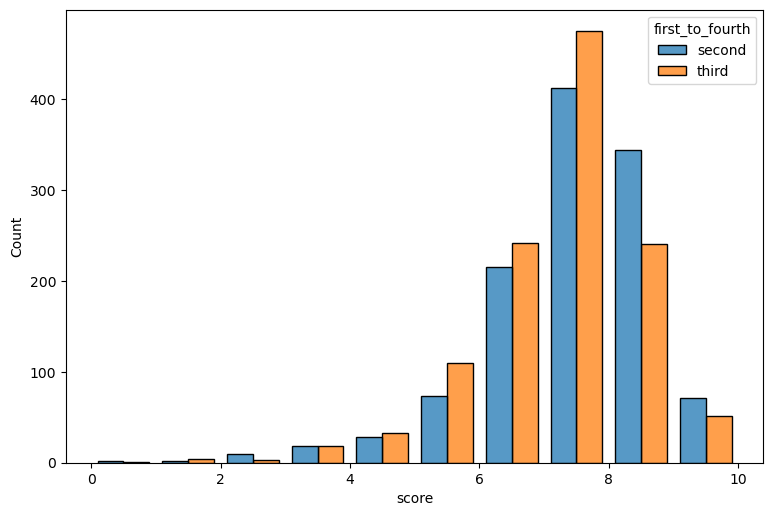

In [42]:
# To make the means and standard deviations of the four albums scores, we need to consider only those 
# artists who had 4 albums or more. That is, we remove rows where frequency of the artist name is less than 4.

df_1234 = df_1234[(df_1234.album_number >= 4)]

# Calculate the mean and the standard error for the mean of the scores of the first 4 albums. 

for a in ['first', 'second', 'third', 'fourth']:
    print('Mean score for the', a, 'album:', 
      df_1234[df_1234.first_to_fourth == a].mean()[1])
    print('Standard deviation of mean score for the', a, 'album:', 
      df_1234[df_1234.first_to_fourth == a].std()[1]/np.sqrt(len(df_1234.first_to_fourth)))


# Additionally, plot the distributions of the second and the third albums.

plt.figure(dpi=100, figsize=(9, 6))
ax = sns.histplot(x='score', data=df_1234[(df_1234.first_to_fourth == 'second') 
                                                 | (df_1234.first_to_fourth == 'third')],
            hue='first_to_fourth', multiple='dodge', shrink=0.8, bins=10)

## 7.3

In [43]:
# t-test for the differnce of the two means:
ttest_ind(df_1234[df_1234.first_to_fourth == 'third'].score, 
          df_1234[df_1234.first_to_fourth == 'fourth'].score, 
          equal_var=False)

Ttest_indResult(statistic=2.401382200881532, pvalue=0.016410394073111775)

#### We clearly see that mean scores for albums decrease with later albums. This suggests that there is no such thing as "Second Album Syndrome", but rather something else. There is a statistically significant difference between second and third album, latter being even worse than second. Fourth is even worse, also significant. There is a clear downward trend, which is not unique for second album. However, most importantly, all albums after first are much worse than first one.

**Task 8 (Eureka — 14 pts)**

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))

In [44]:
band = 1000
talent = np.random.uniform(2, 8, band)

album_quality = []
for i in range(band):
    s = np.random.normal(talent[i], 1)
    album_quality.append(s)
    
df_sim = pd.DataFrame({'band':range(band), 'talent':talent, 'album_quality':album_quality})

df_sim['album'] = ""

for b in range(len(df_sim.band)):
    df_sim.album.iloc[b] = 'first'

df_sim

,band,talent,album_quality,album
0,0,5.534714,6.451586,first
1,1,4.471571,3.522481,first
2,2,7.600375,7.599453,first
3,3,6.268556,5.915166,first
4,4,6.047637,6.793087,first
...,...,...,...,...
995,995,4.667217,3.970937,first
996,996,7.003429,7.678127,first
997,997,4.845310,6.511571,first
998,998,2.198846,2.871797,first


In [45]:
# Discard all bands whose albums received a score smaller than 6.
df_sim = df_sim[df_sim['album_quality'] >= 6]
df_sim

,band,talent,album_quality,album
0,0,5.534714,6.451586,first
2,2,7.600375,7.599453,first
4,4,6.047637,6.793087,first
6,6,6.768433,6.809481,first
7,7,6.729671,6.657614,first
...,...,...,...,...
990,990,6.675735,6.759942,first
992,992,7.245039,8.132006,first
993,993,7.822832,8.516737,first
996,996,7.003429,7.678127,first


In [46]:
# For each of the remaining bands, create two additional albums

df_sim2 = df_sim[['band', 'talent']]

df_sim2['album_quality'] = 0
for i in range(df_sim2.shape[0]):
    s = np.random.normal(df_sim2.talent.iloc[i], 1)
    df_sim2.album_quality.iloc[i] = s
    
df_sim2['album'] = ""
for i in range(df_sim2.shape[0]):
    df_sim2.album.iloc[i] = 'second'
    
df_sim3 = df_sim[['band', 'talent']]
df_sim3['album_quality'] = 0 
for i in range(df_sim3.shape[0]):
    s = np.random.normal(df_sim3.talent.iloc[i], 1)
    df_sim3.album_quality.iloc[i] = s
    
df_sim3['album'] = ""
for i in range(df_sim3.shape[0]):
    df_sim3.album.iloc[i] = 'third'

df_sim = df_sim.append([df_sim2, df_sim3], ignore_index=True)
df_sim

,band,talent,album_quality,album
0,0,5.534714,6.451586,first
1,2,7.600375,7.599453,first
2,4,6.047637,6.793087,first
3,6,6.768433,6.809481,first
4,7,6.729671,6.657614,first
...,...,...,...,...
1030,990,6.675735,5.258598,third
1031,992,7.245039,6.412397,third
1032,993,7.822832,8.501572,third
1033,996,7.003429,6.181767,third


<ipython-input-47-66a9129b9609>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sim[df_sim.album == a].mean()[2])
<ipython-input-47-66a9129b9609>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sim[df_sim.album == a].std()[2]/np.sqrt(len(df_sim.album)))


Mean score for the first album: 7.235908235797723
Standard deviation of mean score for the first album: 0.024975357017928326
Mean score for the second album: 6.754870703698653
Standard deviation of mean score for the second album: 0.038783165327706585
Mean score for the third album: 6.798064586320011
Standard deviation of mean score for the third album: 0.039525696094356466


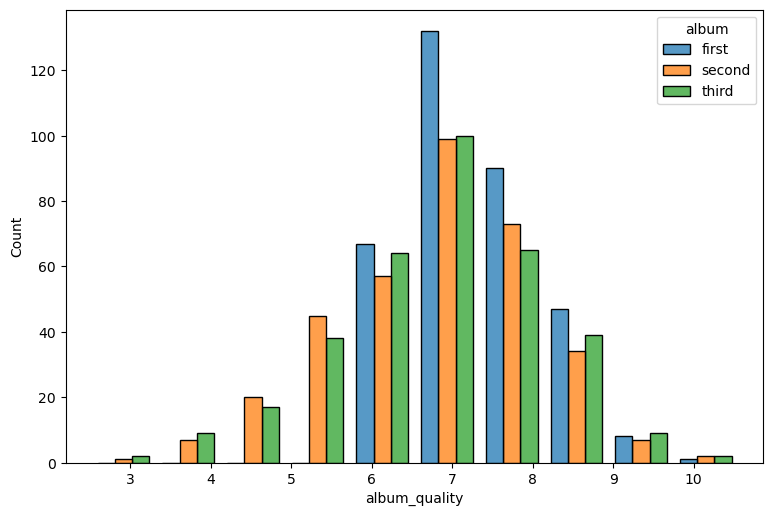

In [47]:
# Analyzing the scores obtained in this simulation, 
# provide a coherent explanation for the scores obtained in Task 7.2.

# Calculate the mean and the standard error for the mean of the scores of the first 3 albums. 

for a in ['first', 'second', 'third']:
    print('Mean score for the', a, 'album:', 
      df_sim[df_sim.album == a].mean()[2])
    print('Standard deviation of mean score for the', a, 'album:', 
      df_sim[df_sim.album == a].std()[2]/np.sqrt(len(df_sim.album)))


# Additionally, plot the distributions of the three albums.

plt.figure(dpi=100, figsize=(9, 6))
ax = sns.histplot(x='album_quality', data=df_sim,
            hue='album', multiple='dodge', shrink=0.8, bins=10)

In [48]:
# t-test for the difference between mean score of the first and second albums:
ttest_ind(df_sim[df_sim.album == 'first'].album_quality, 
          df_sim[df_sim.album == 'second'].album_quality, 
          equal_var=False)

Ttest_indResult(statistic=6.020637594846715, pvalue=3.062121223662141e-09)

### P-value is smaller than any reasonable significance level, so we reject the null hypothesis that the means of the first and the second albums scores are equal. So there is statistical evidence of the significant difference between the scores of the first and the second albums. 

In [49]:
# t-test for the difference between mean score of the second and third albums:
ttest_ind(df_sim[df_sim.album == 'third'].album_quality, 
          df_sim[df_sim.album == 'second'].album_quality,
          equal_var=False)

Ttest_indResult(statistic=0.4503458674995322, pvalue=0.6526029955277675)

#### P-value is larger than any reasonable significance level, so we cannot reject the null hypothesis that the means of the first and the second albums scores are equal. So there is no statistical evidence of the significant difference between the scores of the secons and the third albums.¶

## Conclusion

#### So we observe that the mean of the first album score tends to be higher than the mean of the consequtive albums. This is what we also observed in point 7.2. The reason may be that the second and consequtive albums are released only by the bands that received high scores for their very first album (> 6 in our case). As a result, any band with more than one album has relatively high score for the first album. However, the score for the second album is subject to some randomness and hence inabout half of the cases appear to be lower than that for the first album. And then we compare the mean scores for the first and the second albums and of course see that the former is higher. 

#### As we mentioned earlier, the score of the first album determined a lot the probability that the second album will be released. However, in the simulation, the probability that the third album will be released independent of the score of the second album. As a result, we observe that the mean scores of the second and the third album are almost the same.

#### However, there is statistical difference between 2nd and 3rd album in real life data. which suggests that are other forces, as well as selection bias, for example from the fact that bands could also be "filtered" if 2nd album was bad.

### In conclusion, there seems to be no "second album syndrome", but the "all album after the first syndrome".